### Tide and wind conditions at spill locations in the Salish Sea

Descriptions of surface ocean conditions at nearest locations to spill sites for each oil spill scenario

## Salish Sea Conditions
- Tides, taken from [DFO-Pacific website](https://www.pac.dfo-mpo.gc.ca/science/charts-cartes/obs-app/observed-eng.aspx?StationID=07735) at the nearest tide gauge. 
- Surface winds, hourly atmospheric field values from the Environment Canada High Resolution Deterministic Prediction System (HRDPS) atmospheric forcing model.
- Fraser River Discharge (m^3), from SalishSeaCast.
- Total River Flux (m^3/s), from SalishSeaCast.

### Spill Scenarios
Point source spill scenarios based on discussion with DFO & Transport Canada. [Full scenario descriptions](https://docs.google.com/spreadsheets/d/17HgaXoKG5b0zkigri6Vdw7fNviDKVzzTVrbpVVRrCjk/edit?usp=sharing).

| **spill ID**  | **oil** | **spill size (m^3)** | **season** | **location** |
|---------|---------|--------------------|------------|--------------|
| 4a | Diesel | 500 | summer, ebb tide | Active Pass |
| 5b | Dilbit | 2000 | winter, ebb tide | Turn Point, Arachne Reef |
| 6a | Bunker C| 15 | summer, flood tide | leaving Vancouver Harbour, at Anchorage (Engligh Bay)|
| 7a | Bunker C| 1000 | winter storm, flood tide | Strait of Juan de Fuca |



In [2]:
import sys
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime, date
from IPython.display import Image

from salishsea_tools import places, wind_tools

In [5]:
# Data Paths
current_path = Path('/ocean/rlovindeer/Atlantis/Physics/Raw_Transport_Data/')
wind_path = Path('/ocean/rlovindeer/Atlantis/Physics/Wind/')
wind_speed_path = Path('/results/forcing/atmospheric/GEM2.5/operational/') #file format ops_y2019m07d07.nc vars(u_wind, v_wind)
sea_grid = Path('/ocean/rlovindeer/Atlantis/Physics/Grids/ubcSSnBathymetryV17-02_a29d_efc9_4047.nc')
air_grid = Path('/ocean/rlovindeer/Atlantis/Physics/Grids/ubcSSaAtmosphereGridV1_0f03_6268_df4b.nc')
river_path = Path('/ocean/rlovindeer/MOAD/analysis-raisha/notebooks/contaminant-dispersal/results/Rivers')
tide_path = Path('/ocean/rlovindeer/MOAD/analysis-raisha/notebooks/contaminant-dispersal/results/Tides')

In [89]:
summer_start = day_of_year = date(2018, 7, 1).timetuple().tm_yday
summer_end = day_of_year = date(2018, 8, 30).timetuple().tm_yday
winter_start = day_of_year = date(2018, 1, 1).timetuple().tm_yday
winter_end = day_of_year = date(2018, 3, 1).timetuple().tm_yday
winter2_start = day_of_year = date(2018, 11, 20).timetuple().tm_yday
winter2_end = day_of_year = date(2018, 12, 31).timetuple().tm_yday

print("Days of summer:", summer_start, "to", summer_end)
print("Days of 1st winter option:", winter_start, "to", winter_end)
print("Days of 2nd winter option:", winter2_start, "to", winter2_end)

Days of summer: 182 to 242
Days of 1st winter option: 1 to 60
Days of 2nd winter option: 324 to 365


### Exploring river discharge and flux into the Salish Sea

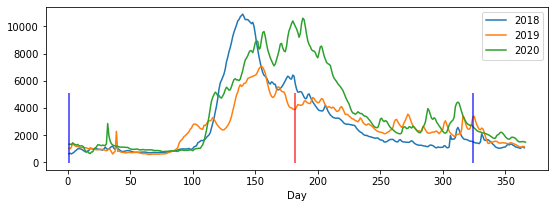

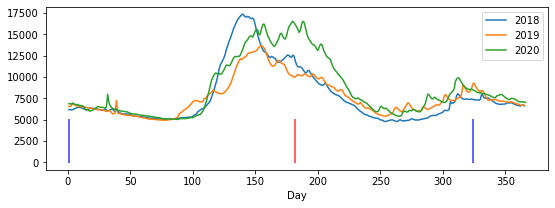

In [90]:
rivers = sorted([p for p in river_path.glob('*.csv')])
for path in rivers:
    discharge = pd.read_csv(path)
    discharge.plot('Day', figsize=(9, 3))
    plt.plot([summer_start, summer_start], [0, 5000], 'r', linewidth = 2, alpha=0.6,)
    plt.plot([winter_start, winter_start], [0, 5000], 'b', linewidth = 2, alpha=0.6,)
    plt.plot([winter2_start, winter2_start], [0, 5000], 'b', linewidth = 2, alpha=0.6,)

### Exporing tides for each scenario location

| **spill ID**  | **season** |**location** | **tide gauge location** |
|---------|----------|----------|------------|
| 4a | summer, ebb tide | Active Pass | Sand Heads |
| 5b | winter, ebb tide | Turn Point, Arachne Reef | Victoria |
| 6a | summer, flood tide | Engligh Bay| Sandy Cove |
| 7a | winter storm, flood tide | Strait of Juan de Fuca | Port Renfrew |




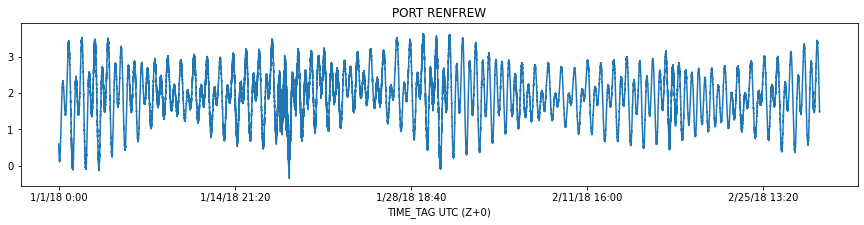

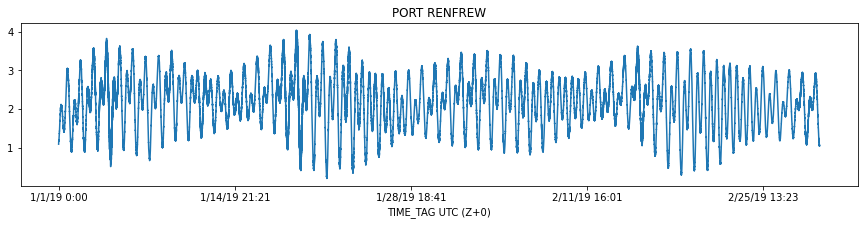

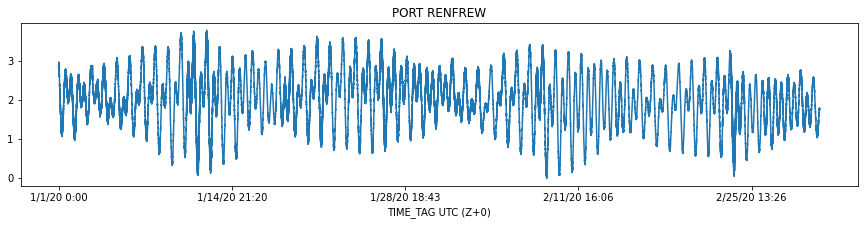

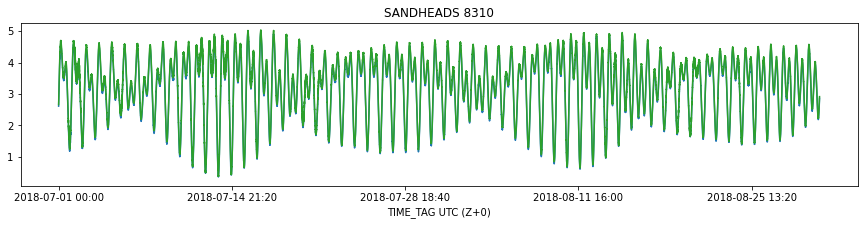

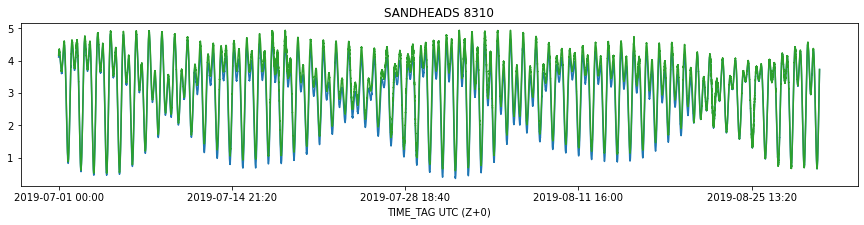

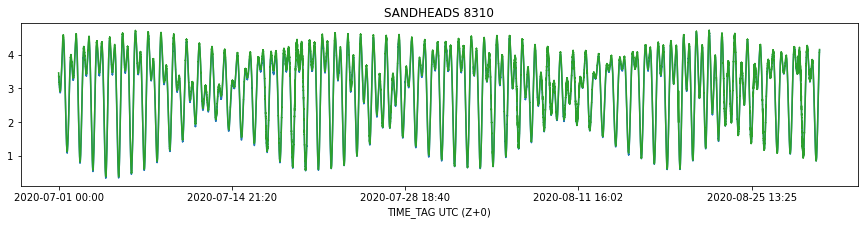

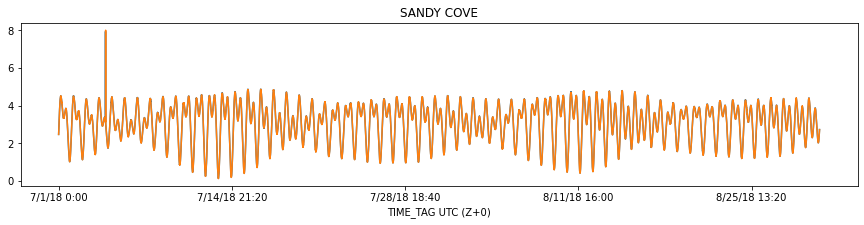

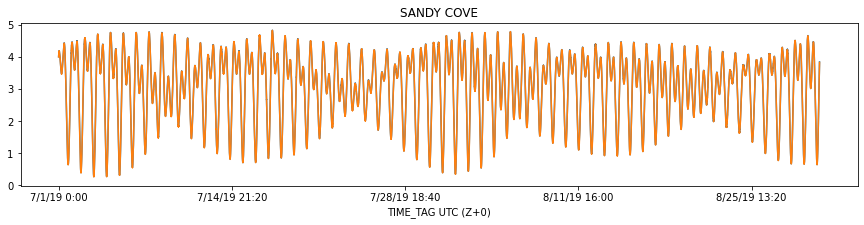

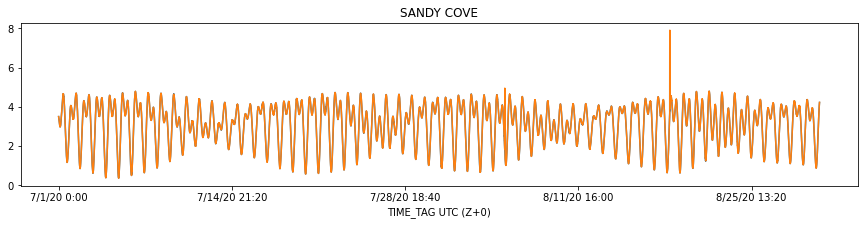

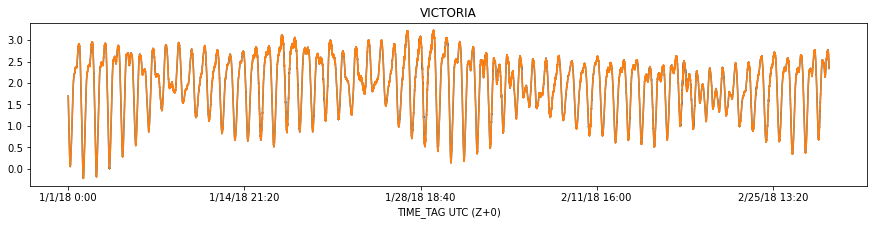

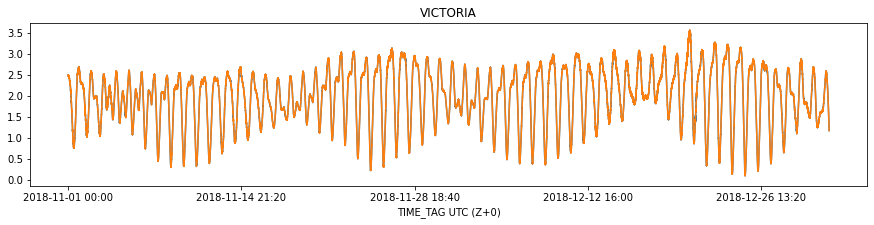

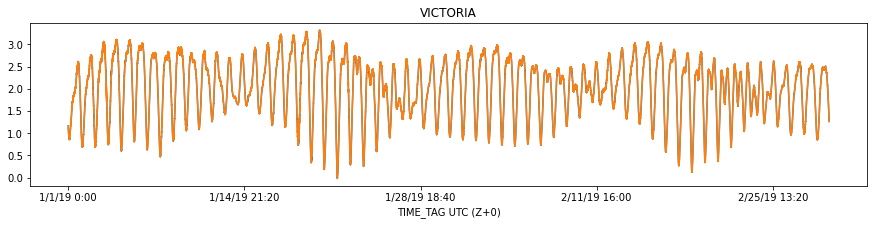

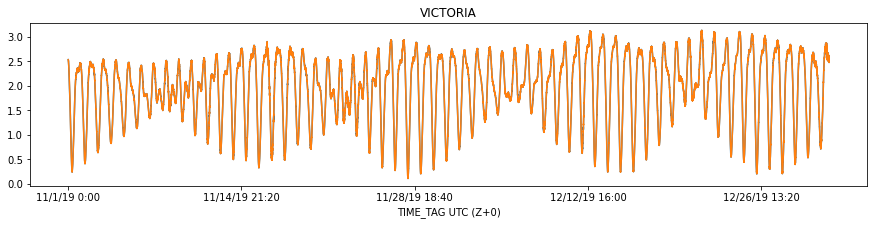

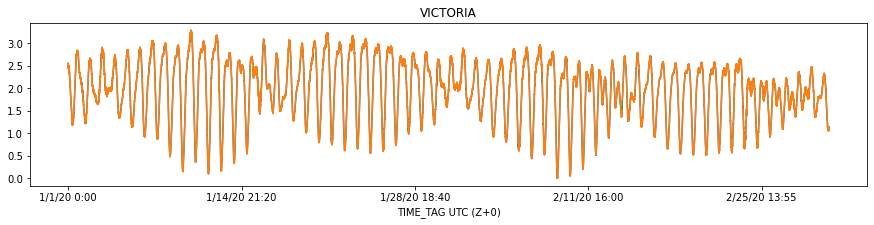

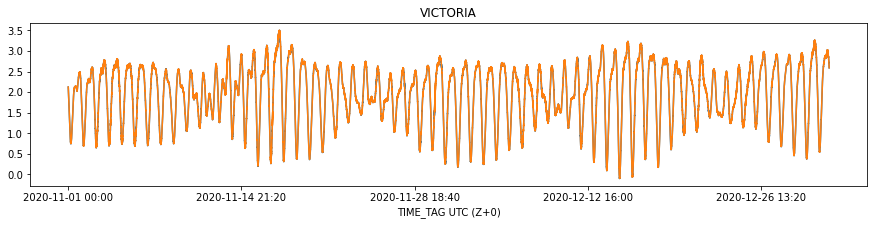

In [91]:
# Tides
tides = sorted([p for p in tide_path.glob('*.csv')])
for path in tides:
    tide_data = pd.read_csv(path)
    station = tide_data['STATION_ID'][1]
    tide_data.plot('TIME_TAG UTC (Z+0)', figsize=(15, 3), legend=False, title=station)

### Exploring surface wind speed

In [63]:
def plot_wind_speed(wind_paths, place):
    
    yx = places.PLACES[place]['wind grid ji']
    
    winds = sorted([p for p in wind_path.glob(wind_paths)])
    plt.figure(figsize = (15,3))
    for path in winds:
        wind_data = xr.open_dataset(path)
        wind_speed, wind_dir = wind_tools.wind_speed_dir(wind_data.u_wind[:,yx[0],yx[1]], wind_data.v_wind[:,yx[0],yx[1]])
        plt.plot(wind_data.time, wind_speed, 'ok')

Sand Heads in the summer

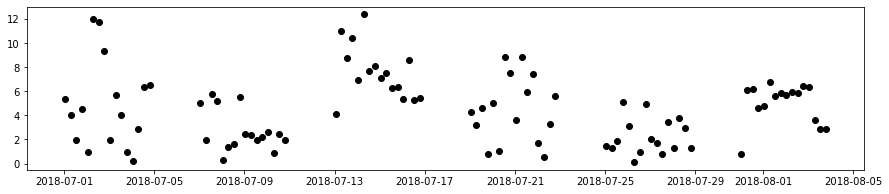

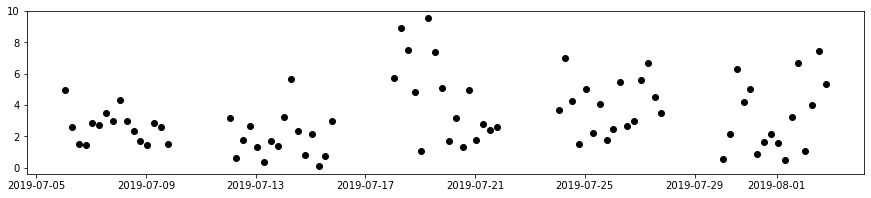

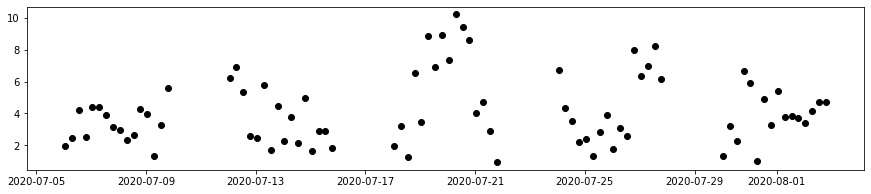

In [66]:
for year in [2018, 2019, 2020]:
    plot_wind_speed(str(year)+'-07-*_Wind_variables.nc', 'Sand Heads')

Victoria in the winter (January)

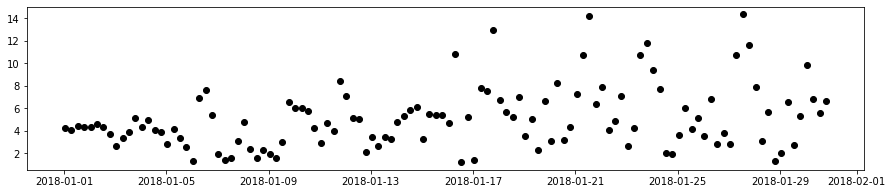

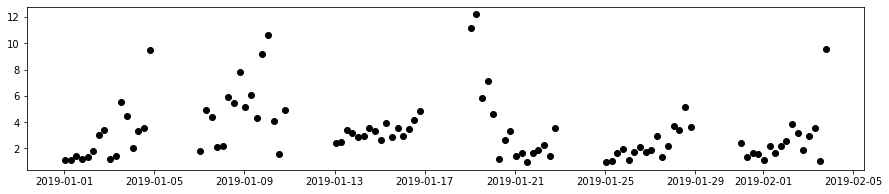

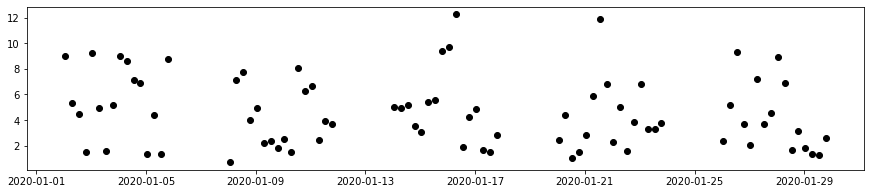

In [68]:
for year in [2018, 2019, 2020]:
    plot_wind_speed(str(year)+'-01-*_Wind_variables.nc', 'Victoria')

Victoria in the winter (November - December)

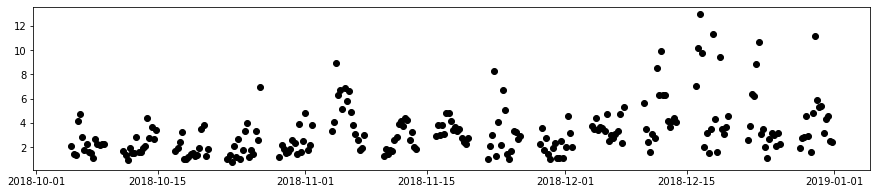

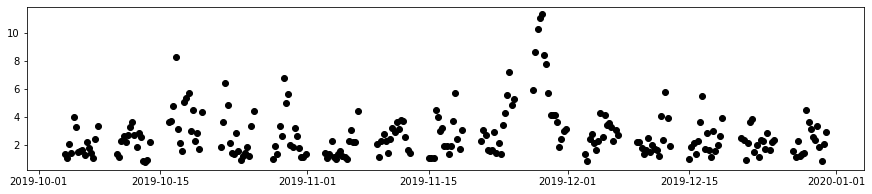

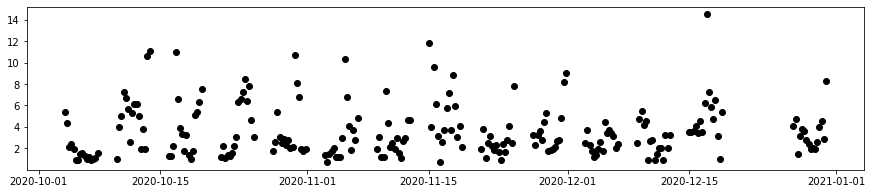

In [93]:
for year in [2018, 2019, 2020]:
    plot_wind_speed(str(year)+'-1*-*_Wind_variables.nc', 'Victoria')

Sandy Cove in the summer

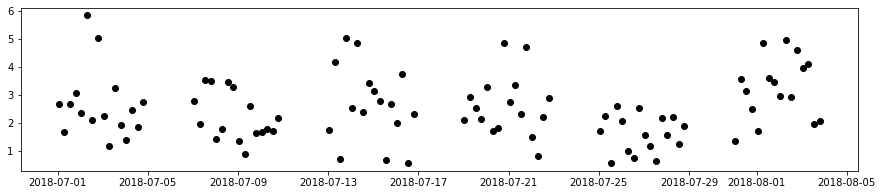

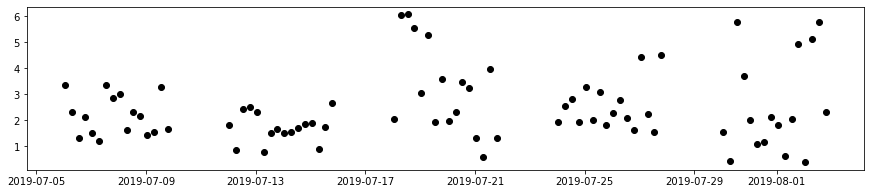

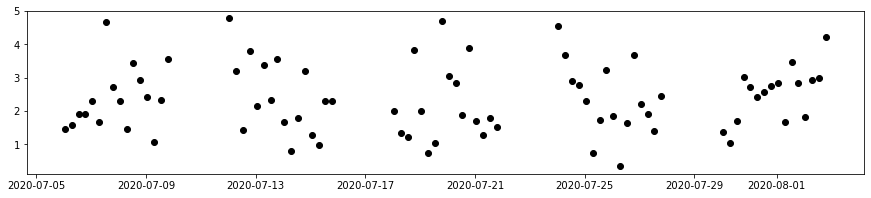

In [70]:
for year in [2018, 2019, 2020]:
    plot_wind_speed(str(year)+'-07-*_Wind_variables.nc', 'Sandy Cove')

Port Renfrew in the winter

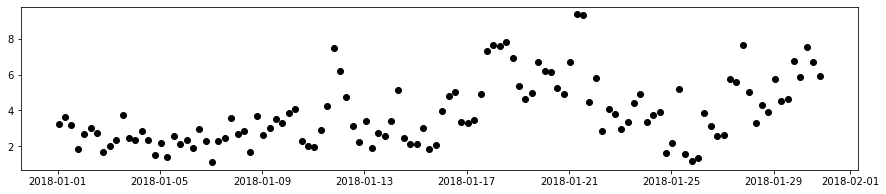

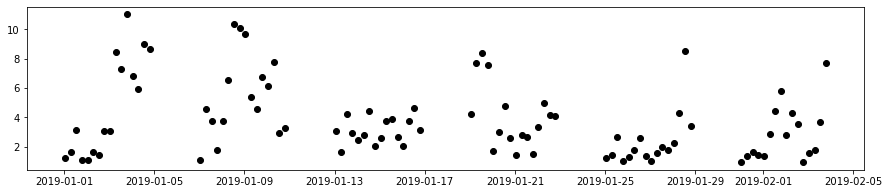

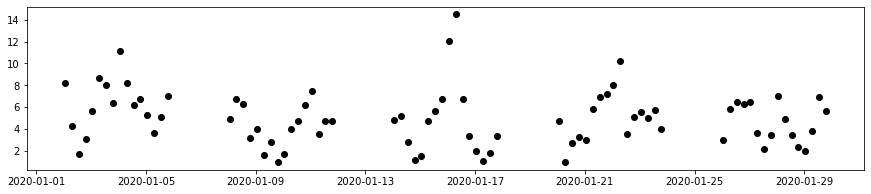

In [69]:
for year in [2018, 2019, 2020]:
    plot_wind_speed(str(year)+'-01-*_Wind_variables.nc', 'Port Renfrew')